In [0]:
import warnings
import math
import pickle
from xgboost import XGBClassifier as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pyodbc
import gc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc,precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
# import pyodbc
import fancyimpute
# import xverse
warnings.filterwarnings('ignore')

In [0]:
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train)    
    pred=clf.predict(features_test)
    pred_proba = clf.predict_proba(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("Accuracy : {}", accuracy_score(labels_test,pred))
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("ROC", roc_auc_score(labels_test, pred))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    return pred, pred_proba, labels_test


def model2(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train)
    
    pred=clf.predict(features_train)
    pred_proba = clf.predict_proba(features_train)
    cnf_matrix=confusion_matrix(labels_train,pred)
    print("Accuracy : {}", accuracy_score(labels_train,pred))
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("ROC", roc_auc_score(labels_train, pred))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_train,pred))
    
    pred=clf.predict(features_test)
    pred_proba = clf.predict_proba(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("Accuracy : {}", accuracy_score(labels_test,pred))
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("ROC", roc_auc_score(labels_test, pred))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    return pred, pred_proba, labels_test
    
def data_prep(X,y, num):
    X = X
    y = y
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=num,random_state=42, stratify = y)
    print("========== panjang X train ==========")
    print(str(len(X_train)))
    print("========== panjang X test ===========")
    print(str(len(X_test)))
    return X_train, X_test, y_train, y_test

def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

def get_cum_gains(df,score,target,title):
    df1 = df[[score,target]].dropna()
    fpr, tpr, thresholds = roc_curve(df1[target], df1[score])
    ppr=(tpr*df[target].sum()+fpr*(df[target].count()-df[target].sum()))/df[target].count()
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(ppr, tpr, label='')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('%Target')
    plt.title(title+'Cumulative Gains Chart')
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(ppr, tpr/ppr, label='')
    plt.plot([0, 1], [1, 1], 'k--')
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('Lift')
    plt.title(title+'Lift Curve')
    
def get_precision_recall(df,score,target,title):
    precision, recall, _ = precision_recall_curve(df[target], df[score])
    roc_pr = average_precision_score(df[target], df[score])
    # Plot ROC curve
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.2f)' % roc_pr)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title+"Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.grid(b=True, which='both', color='0.65',linestyle='-')

In [0]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [0]:
# df_train = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv') --kaggle
# df_test = pd.read_csv('/kaggle/input/my-dataset/credit_test.csv') --kaggle
df_train = pd.read_csv('credit_train.csv')
df_test = pd.read_csv('credit_test.csv')

In [306]:
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [307]:
df_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


# Data Prep

In [308]:
for x in df_train.columns:
    if x not in df_test.columns:
        print(x)

Loan Status


In [0]:
# concatenate data train and data test
df_test['Loan Status'] = 'DUMMY'
df_test['tag_training'] = 0
df_train['tag_training'] = 1
df = pd.concat([df_train, df_train])

In [310]:
100 * df[df.tag_training==1]['Loan Status'].value_counts()/len(df[df.tag_training==1])

Fully Paid     76.965398
Charged Off    22.523231
Name: Loan Status, dtype: float64

In [0]:
# Change Fully Paid with 0 and Charged Off with 1
df['Loan Status'] = df['Loan Status'].replace(['DUMMY','Fully Paid','Charged Off'],[2,0,1])

In [312]:
100 * df[df['Loan ID'].isna() == False].isna().sum()/len(df[df['Loan ID'].isna() == False])

Loan ID                          0.000
Customer ID                      0.000
Loan Status                      0.000
Current Loan Amount              0.000
Term                             0.000
Credit Score                    19.154
Annual Income                   19.154
Years in current job             4.222
Home Ownership                   0.000
Purpose                          0.000
Monthly Debt                     0.000
Years of Credit History          0.000
Months since last delinquent    53.141
Number of Open Accounts          0.000
Number of Credit Problems        0.000
Current Credit Balance           0.000
Maximum Open Credit              0.002
Bankruptcies                     0.204
Tax Liens                        0.010
tag_training                     0.000
dtype: float64

In [313]:
df[df['Loan ID'].isna() == False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       200000 non-null  object 
 1   Customer ID                   200000 non-null  object 
 2   Loan Status                   200000 non-null  float64
 3   Current Loan Amount           200000 non-null  float64
 4   Term                          200000 non-null  object 
 5   Credit Score                  161692 non-null  float64
 6   Annual Income                 161692 non-null  float64
 7   Years in current job          191556 non-null  object 
 8   Home Ownership                200000 non-null  object 
 9   Purpose                       200000 non-null  object 
 10  Monthly Debt                  200000 non-null  float64
 11  Years of Credit History       200000 non-null  float64
 12  Months since last delinquent  93718 non-null 

In [314]:
# We need to have a better understanding about the data
dfData = df.copy()
colnames = list(dfData.columns.values)
dataType = []
for col in colnames:
    a = str(dfData[col].dtypes)
    dataType.append(a)
nullVal = []
for col in colnames:
    a = dfData[col].isnull().sum()
    nullVal.append(a)
nullPct = []
for col in colnames:
    a = dfData[col].isnull().sum()/dfData.shape[0]
    nullPct.append(a)
uniqueVal = []
for col in colnames:
    a = len(list(dfData[col].unique()))
    uniqueVal.append(a)
uniqueSample = []
for col in colnames:
    a = list(dfData[col].unique())
    uniqueSample.append(a[0:5])
    
pd.set_option('display.max_rows', None)
dfInspection = pd.DataFrame(data = {'dataFeatures': colnames, 'dataType': dataType, 'null': nullVal, 'nullPct': nullPct, 
                                    'unique': uniqueVal, 'uniqueSample': uniqueSample})
dfInspection


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Loan ID,object,1028,0.005114,82000,"[14dd8831-6af5-400b-83ec-68e61888a048, 4771cc2..."
1,Customer ID,object,1028,0.005114,82000,"[981165ec-3274-42f5-a3b4-d104041a9ca9, 2de017a..."
2,Loan Status,float64,1028,0.005114,3,"[0.0, 1.0, nan]"
3,Current Loan Amount,float64,1028,0.005114,22005,"[445412.0, 262328.0, 99999999.0, 347666.0, 176..."
4,Term,object,1028,0.005114,3,"[Short Term, Long Term, nan]"
5,Credit Score,float64,39336,0.195674,325,"[709.0, nan, 741.0, 721.0, 7290.0]"
6,Annual Income,float64,39336,0.195674,36175,"[1167493.0, nan, 2231892.0, 806949.0, 896857.0]"
7,Years in current job,object,9472,0.047118,12,"[8 years, 10+ years, 3 years, 5 years, < 1 year]"
8,Home Ownership,object,1028,0.005114,5,"[Home Mortgage, Own Home, Rent, HaveMortgage, ..."
9,Purpose,object,1028,0.005114,17,"[Home Improvements, Debt Consolidation, Buy Ho..."


In [0]:
# Check Correlation

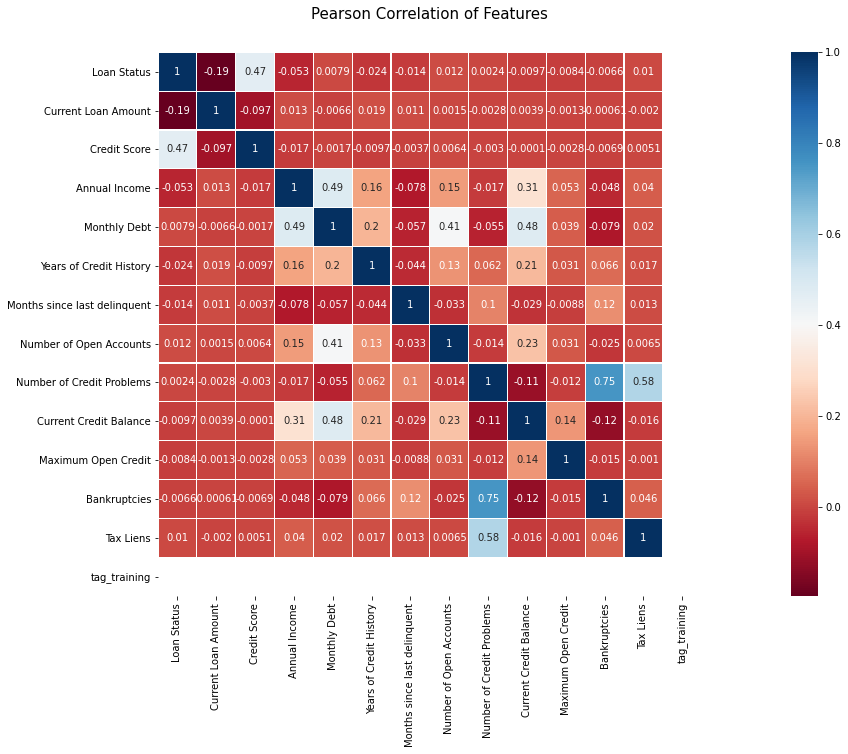

In [316]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

In [0]:
# Check Credit Score

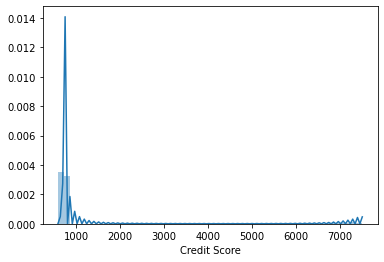

In [318]:
sns.distplot(df[df['Credit Score'].isna() == False]['Credit Score']) 

plt.show()

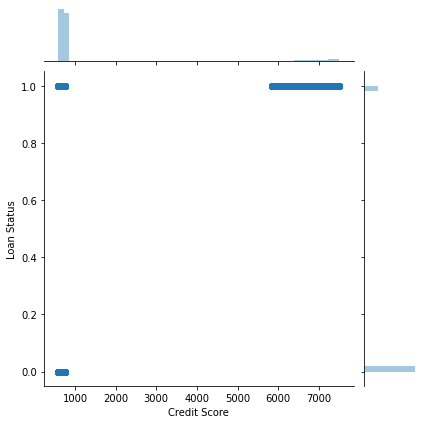

In [319]:


sns.jointplot(x="Credit Score", y="Loan Status", data=df[df['Credit Score'].isna() == False])

plt.show()



In [0]:
# Check Current Loan Amount

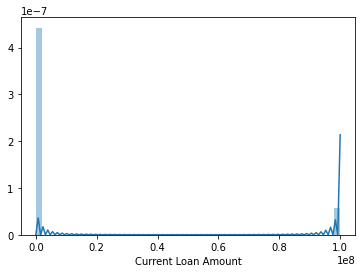

In [321]:
sns.distplot(df[df['Current Loan Amount'].isna() == False]['Current Loan Amount']) 

plt.show()

In [0]:
# Check Feature Statistic

In [0]:
df_cols = list()
for x in df.columns:
    if df[x].dtype != 'O':
        df_cols.append(x)

In [324]:
df[df_cols].describe()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,tag_training
count,200000.000000,2.000000e+05,161692.000000,1.616920e+05,200000.000000,200000.000000,93718.000000,200000.000000,200000.000000,2.000000e+05,1.999960e+05,199592.000000,199980.000000,201028.0
mean,0.226390,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.128530,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313,1.0
std,0.418495,3.178386e+07,1475.399229,1.081357e+06,12174.962172,7.015306,21.997711,5.009858,0.482704,3.761700e+05,8.384483e+06,0.351423,0.258182,0.0
min,0.000000,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0
25%,0.000000,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.000000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000,1.0
50%,0.000000,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.000000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000,1.0
75%,0.000000,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.000000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000,1.0
max,1.000000,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000,1.0


In [0]:
# Replace Data with KNN

In [0]:
# from fancyimpute import KNN 
# # Use 5 nearest rows which have a feature to fill in each row's
# # missing features
# df_new = pd.DataFrame(KNN(k=5).fit_transform(df[df_cols]))
# df_new.columns = df_cols

In [0]:
df_temp = df.copy()

In [0]:
# Replace data with median from every group

In [0]:
# if your computer is too slow, you can replace the numeric data with mean with this code below :
for x in df_temp.columns:
    if df_temp[x].dtype == 'O':
        df_temp[x] = df_temp[x].fillna(df_temp[x].mode()[0])

In [0]:
df_temp['Credit Score'] = df_temp['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [0]:
df_temp['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)

In [0]:
for x in ['Current Loan Amount','Annual Income','Monthly Debt','Credit Score']:
    if df_temp[x].dtype != 'O':
        df_temp[x] = df_temp[x].replace([np.nan, -np.inf, np.inf,99999999],[np.nan, np.nan, np.nan, np.nan])
        df_temp[x] = df_temp[x].fillna(df_temp.groupby(['Term','Years in current job','Purpose'])[x].transform('median'))

In [0]:
df_temp = df_temp.fillna(0)

In [334]:
df_temp.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,tag_training
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,0.0,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,0.0,262328.0,0,731.0,1205426.5,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0.0,245630.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,0.0,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,0.0,176220.0,0,732.0,1088149.0,5 years,Rent,Debt Consolidation,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0,1


In [335]:
df_temp[df_temp.tag_training == 1].isna().sum()/len(df_temp[df_temp.tag_training==1])

Loan ID                         0.0
Customer ID                     0.0
Loan Status                     0.0
Current Loan Amount             0.0
Term                            0.0
Credit Score                    0.0
Annual Income                   0.0
Years in current job            0.0
Home Ownership                  0.0
Purpose                         0.0
Monthly Debt                    0.0
Years of Credit History         0.0
Months since last delinquent    0.0
Number of Open Accounts         0.0
Number of Credit Problems       0.0
Current Credit Balance          0.0
Maximum Open Credit             0.0
Bankruptcies                    0.0
Tax Liens                       0.0
tag_training                    0.0
dtype: float64

In [0]:
# Drop missing values :
df_temp = df_temp.dropna()

In [337]:
df_temp[df_temp['Loan Status']==0].describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,tag_training
count,155750.0,155750.000000,155750.000000,155750.000000,1.557500e+05,155750.000000,155750.000000,155750.000000,155750.000000,155750.000000,1.557500e+05,1.557500e+05,155750.000000,155750.000000,155750.0
mean,0.0,300662.476944,0.249451,719.055384,1.363330e+06,18410.913560,18.168387,16.410966,11.022909,0.166587,2.946461e+05,7.936427e+05,0.117971,0.027698,1.0
std,0.0,175353.054696,0.432697,25.292438,8.494015e+05,12135.716968,7.123316,23.045235,5.061798,0.478655,3.758453e+05,9.438172e+06,0.351931,0.250618,0.0
min,0.0,10802.000000,0.000000,585.000000,8.109200e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0
25%,0.0,175846.000000,0.000000,707.000000,9.388138e+05,10164.050000,13.500000,0.000000,7.000000,0.000000,1.094210e+05,2.726460e+05,0.000000,0.000000,1.0
50%,0.0,257884.000000,0.000000,725.000000,1.205426e+06,16239.300000,17.000000,0.000000,10.000000,0.000000,2.070240e+05,4.721200e+05,0.000000,0.000000,1.0
75%,0.0,404954.000000,0.000000,737.000000,1.554048e+06,23936.390000,21.800000,30.000000,14.000000,0.000000,3.665290e+05,7.966860e+05,0.000000,0.000000,1.0
max,0.0,789250.000000,1.000000,751.000000,3.647544e+07,229057.920000,70.500000,176.000000,56.000000,15.000000,1.298696e+07,1.539738e+09,7.000000,15.000000,1.0


In [338]:
df_temp[df_temp['Loan Status']==1].describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,tag_training
count,45278.0,45278.000000,45278.000000,45278.000000,4.527800e+04,45278.000000,45278.000000,45278.000000,45278.000000,45278.000000,4.527800e+04,4.527800e+04,45278.000000,45278.000000,45278.0
mean,1.0,324975.226821,0.369539,712.400128,1.249058e+06,18650.565494,17.891736,15.788551,11.239189,0.170414,2.879180e+05,6.304781e+05,0.113212,0.034189,1.0
std,0.0,185903.863388,0.482685,29.226729,1.315678e+06,12171.843855,7.089944,22.810598,5.048869,0.491667,3.755797e+05,2.022677e+06,0.344634,0.279896,0.0
min,1.0,21450.000000,0.000000,0.000000,0.000000e+00,0.000000,4.100000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0
25%,1.0,179877.500000,0.000000,701.000000,8.703188e+05,10514.885000,13.000000,0.000000,8.000000,0.000000,1.178048e+05,2.638900e+05,0.000000,0.000000,1.0
50%,1.0,286726.000000,0.000000,720.000000,1.142850e+06,16454.380000,16.600000,0.000000,10.000000,0.000000,2.139780e+05,4.433220e+05,0.000000,0.000000,1.0
75%,1.0,439840.500000,1.000000,732.000000,1.362851e+06,24040.130000,21.300000,28.000000,14.000000,0.000000,3.670372e+05,7.265720e+05,0.000000,0.000000,1.0
max,1.0,789250.000000,1.000000,751.000000,1.655574e+08,435843.280000,60.500000,152.000000,76.000000,12.000000,3.287897e+07,1.750436e+08,5.000000,9.000000,1.0


In [339]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201028 entries, 0 to 100513
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       201028 non-null  object 
 1   Customer ID                   201028 non-null  object 
 2   Loan Status                   201028 non-null  float64
 3   Current Loan Amount           201028 non-null  float64
 4   Term                          201028 non-null  int64  
 5   Credit Score                  201028 non-null  float64
 6   Annual Income                 201028 non-null  float64
 7   Years in current job          201028 non-null  object 
 8   Home Ownership                201028 non-null  object 
 9   Purpose                       201028 non-null  object 
 10  Monthly Debt                  201028 non-null  float64
 11  Years of Credit History       201028 non-null  float64
 12  Months since last delinquent  201028 non-nul

In [0]:
# feature enginering :
df_temp['dsr'] = (df_temp['Monthly Debt']*12)/(df_temp['Annual Income']+1)
df_temp['tag credit Score'] = df_temp['Credit Score'].apply(lambda val: 1 if np.isreal(val) and val < 580 else val)
df_temp['tag credit Score'] = df_temp['Credit Score'].apply(lambda val: 2 if np.isreal(val) and (val >= 580 and val < 670) else val)
df_temp['tag credit Score'] = df_temp['Credit Score'].apply(lambda val: 3 if np.isreal(val) and (val >= 670 and val < 740) else val)
df_temp['tag credit Score'] = df_temp['Credit Score'].apply(lambda val: 4 if np.isreal(val) and (val >= 740 and val < 800) else val)
df_temp['tag credit Score'] = df_temp['Credit Score'].apply(lambda val: 5 if np.isreal(val) and (val >= 800 and val <= 850) else val)


df_temp['tag credit Problems'] = df_temp['Number of Credit Problems'].apply(lambda x: 3 if x==0 else (2 if x>0 and x<5 else 1))
df_temp['tag credit Age'] = df_temp['Years of Credit History'].apply(lambda x: 1 if x<5 else (2 if x>5 and x<17 else 3))
df_temp['tag tax Liens'] = df_temp['Tax Liens'].apply(lambda x: 3 if x==0 else (2 if x>0 and x<3 else 1))
df_temp['tag bankruptcies'] = df_temp['Bankruptcies'].apply(lambda x: 3 if x==0 else (2 if x>0 and x<3 else 1))

df_temp = df_temp.drop(columns = ['Number of Credit Problems','Years of Credit History','Tax Liens',])

In [0]:
# #Check parplot between 2 features
# sns.set_style("ticks")
# sns.pairplot(df_temp, hue='Loan Status')
# plt.show()

In [342]:
df_temp.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,tag_training,dsr,tag credit Score,tag credit Problems,tag credit Age,tag tax Liens,tag bankruptcies
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,0.0,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,0.0,6.0,228190.0,416746.0,1.0,1,0.053599,709.0,2,3,3,2
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,0.0,262328.0,0,731.0,1205426.5,10+ years,Home Mortgage,Debt Consolidation,33295.98,8.0,35.0,229976.0,850784.0,0.0,1,0.331461,731.0,3,3,3,3
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0.0,245630.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,29.0,18.0,297996.0,750090.0,0.0,1,0.157000,741.0,2,2,3,3
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,0.0,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,0.0,9.0,256329.0,386958.0,0.0,1,0.129999,721.0,3,2,3,3
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,0.0,176220.0,0,732.0,1088149.0,5 years,Rent,Debt Consolidation,20639.70,0.0,15.0,253460.0,427174.0,0.0,1,0.227612,732.0,3,2,3,3


In [0]:
# drop un-relevant data: Maximum Open Credit

df_temp2 = pd.get_dummies(df_temp.drop(columns = ['Customer ID','Loan ID', 'Maximum Open Credit']))

In [0]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [345]:
df_temp2.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Bankruptcies,tag_training,dsr,tag credit Score,tag credit Problems,tag credit Age,tag tax Liens,tag bankruptcies,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.0,445412.0,0,709.0,1167493.0,5214.74,0.0,6.0,228190.0,1.0,1,0.053599,709.0,2,3,3,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,262328.0,0,731.0,1205426.5,33295.98,8.0,35.0,229976.0,0.0,1,0.331461,731.0,3,3,3,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,245630.0,0,741.0,2231892.0,29200.53,29.0,18.0,297996.0,0.0,1,0.157000,741.0,2,2,3,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,347666.0,1,721.0,806949.0,8741.90,0.0,9.0,256329.0,0.0,1,0.129999,721.0,3,2,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,176220.0,0,732.0,1088149.0,20639.70,0.0,15.0,253460.0,0.0,1,0.227612,732.0,3,2,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data_train = df_temp2[df_temp2.tag_training == 1]
data_test = df_temp2[df_temp2.tag_training == 0]

X = data_train.drop(columns=['Loan Status','tag_training'])
y = data_train['Loan Status']


In [0]:
sc_x = StandardScaler()
X_sc = pd.DataFrame(sc_x.fit_transform(X), columns = X.columns)

In [348]:
X_train, X_test, y_train, y_test = data_prep(X,y,0.25)

========== panjang X train ==========
150771
========== panjang X test ===========
50257


In [0]:
# Smote Tomek

In [0]:
from imblearn.combine import SMOTETomek
stomek = SMOTETomek (random_state=10)
x_stomek, y_stomek = stomek.fit_sample(X_train, y_train)
x_stomek = pd.DataFrame(x_stomek,columns = X_train.columns)

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
x_smote, y_smote = sm.fit_sample(X_train, y_train)
x_smote = pd.DataFrame(x_smote,columns = X_train.columns)

In [0]:
from imblearn.under_sampling import TomekLinks
tomekl = TomekLinks(random_state=0,n_jobs=24)
x_tomekl, y_tomekl = tomekl.fit_sample(X_train, y_train)
x_tomekl = pd.DataFrame(x_tomekl,columns = X_train.columns)

In [0]:
# Modeling

In [0]:
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import Sequential

In [0]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal', input_dim=len(X.columns)))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Second  Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [0]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [357]:
#Fitting the data to the training dataset
classifier.fit(x_tomekl, y_tomekl,validation_split=0.4, batch_size=10, epochs=2, verbose=1)

Train on 89743 samples, validate on 59830 samples
Epoch 1/2
89743/89743 [==============================] - 30s 330us/sample - loss: 0.5415 - acc: 0.7729 - val_loss: 0.5351 - val_acc: 0.7729
Epoch 2/2
89743/89743 [==============================] - 29s 320us/sample - loss: 0.5354 - acc: 0.7730 - val_loss: 0.5330 - val_acc: 0.7729


In [0]:
# eval_model=classifier.evaluate(x_tomekl, y_tomekl)
# eval_model

In [0]:
def grafik_cm(labels_test,pred):
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("Accuracy : {}", accuracy_score(labels_test,pred))
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("ROC", roc_auc_score(labels_test, pred))
    fig= plt.figure(figsize=(6,3))
    print("TP",cnf_matrix[1,1,])
    print("TN",cnf_matrix[0,0]) 
    print("FP",cnf_matrix[0,1]) 
    print("FN",cnf_matrix[1,0]) 
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

====================================0.2=====================
Accuracy : {} 0.2373798674811469
the recall for this model is : 0.9900167859351533
ROC 0.5043052238268915
TP 11206
TN 724
FP 38214
FN 113


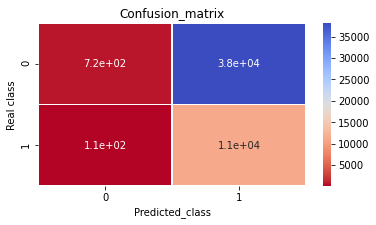


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.02      0.04     38938
         1.0       0.23      0.99      0.37     11319

    accuracy                           0.24     50257
   macro avg       0.55      0.50      0.20     50257
weighted avg       0.72      0.24      0.11     50257

====================================0.21000000000000002=====================
Accuracy : {} 0.31422488409574784
the recall for this model is : 0.9286156020849898
ROC 0.5321207344237677
TP 10511
TN 5281
FP 33657
FN 808


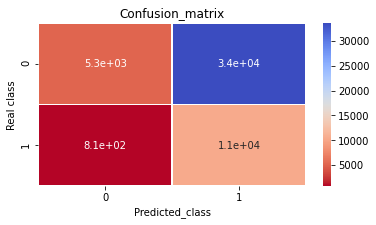


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.14      0.23     38938
         1.0       0.24      0.93      0.38     11319

    accuracy                           0.31     50257
   macro avg       0.55      0.53      0.31     50257
weighted avg       0.73      0.31      0.27     50257

====================================0.22000000000000003=====================
Accuracy : {} 0.7005790238175776
the recall for this model is : 0.25461613216715256
ROC 0.542416700322623
TP 2882
TN 32327
FP 6611
FN 8437


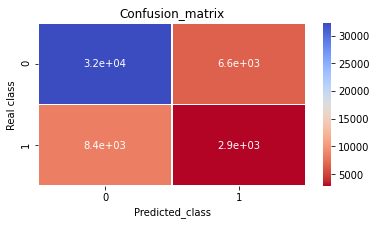


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81     38938
         1.0       0.30      0.25      0.28     11319

    accuracy                           0.70     50257
   macro avg       0.55      0.54      0.54     50257
weighted avg       0.68      0.70      0.69     50257

====================================0.23000000000000004=====================
Accuracy : {} 0.7161191475814315
the recall for this model is : 0.20761551373796272
ROC 0.5357765277354871
TP 2350
TN 33640
FP 5298
FN 8969


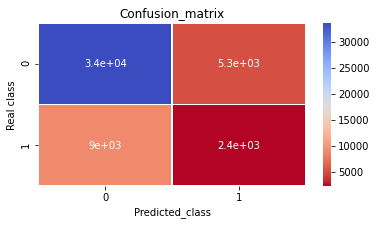


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83     38938
         1.0       0.31      0.21      0.25     11319

    accuracy                           0.72     50257
   macro avg       0.55      0.54      0.54     50257
weighted avg       0.68      0.72      0.70     50257

====================================0.24000000000000005=====================
Accuracy : {} 0.7218098971287582
the recall for this model is : 0.18817916777100452
ROC 0.5325558636122474
TP 2130
TN 34146
FP 4792
FN 9189


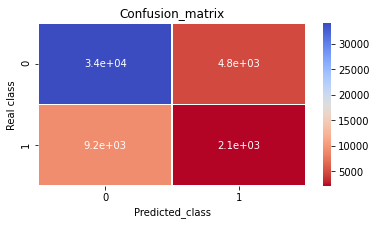


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83     38938
         1.0       0.31      0.19      0.23     11319

    accuracy                           0.72     50257
   macro avg       0.55      0.53      0.53     50257
weighted avg       0.68      0.72      0.70     50257

====================================0.25000000000000006=====================
Accuracy : {} 0.724933840062081
the recall for this model is : 0.17581058397384927
ROC 0.530185326914245
TP 1990
TN 34443
FP 4495
FN 9329


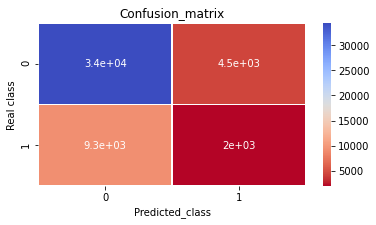


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83     38938
         1.0       0.31      0.18      0.22     11319

    accuracy                           0.72     50257
   macro avg       0.55      0.53      0.53     50257
weighted avg       0.68      0.72      0.70     50257

====================================0.26000000000000006=====================
Accuracy : {} 0.7747776429154147
the recall for this model is : 0.0
ROC 0.5
TP 0
TN 38938
FP 0
FN 11319


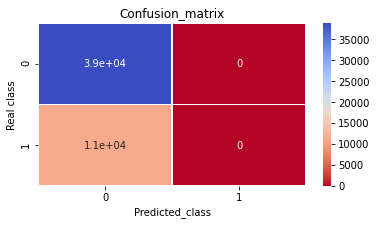


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     38938
         1.0       0.00      0.00      0.00     11319

    accuracy                           0.77     50257
   macro avg       0.39      0.50      0.44     50257
weighted avg       0.60      0.77      0.68     50257

====================================0.2700000000000001=====================
Accuracy : {} 0.7747776429154147
the recall for this model is : 0.0
ROC 0.5
TP 0
TN 38938
FP 0
FN 11319


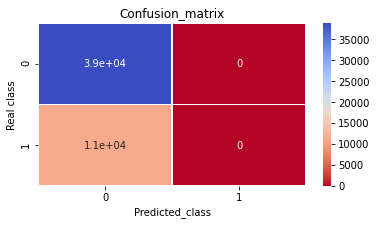


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     38938
         1.0       0.00      0.00      0.00     11319

    accuracy                           0.77     50257
   macro avg       0.39      0.50      0.44     50257
weighted avg       0.60      0.77      0.68     50257

====================================0.2800000000000001=====================
Accuracy : {} 0.7747776429154147
the recall for this model is : 0.0
ROC 0.5
TP 0
TN 38938
FP 0
FN 11319


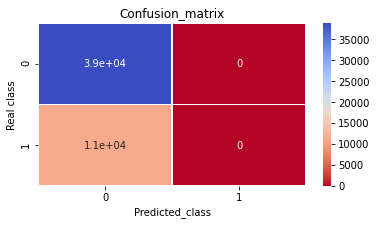


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     38938
         1.0       0.00      0.00      0.00     11319

    accuracy                           0.77     50257
   macro avg       0.39      0.50      0.44     50257
weighted avg       0.60      0.77      0.68     50257

====================================0.2900000000000001=====================
Accuracy : {} 0.7747776429154147
the recall for this model is : 0.0
ROC 0.5
TP 0
TN 38938
FP 0
FN 11319


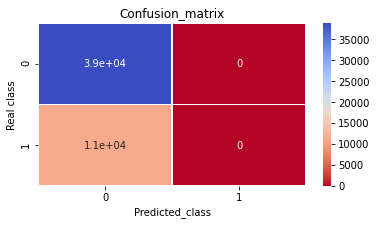


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     38938
         1.0       0.00      0.00      0.00     11319

    accuracy                           0.77     50257
   macro avg       0.39      0.50      0.44     50257
weighted avg       0.60      0.77      0.68     50257

====================================0.3000000000000001=====================
Accuracy : {} 0.7747776429154147
the recall for this model is : 0.0
ROC 0.5
TP 0
TN 38938
FP 0
FN 11319


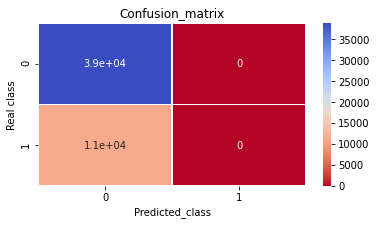


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     38938
         1.0       0.00      0.00      0.00     11319

    accuracy                           0.77     50257
   macro avg       0.39      0.50      0.44     50257
weighted avg       0.60      0.77      0.68     50257



In [360]:
for z in np.arange(0.2,0.31,0.01):
    print("===================================="+str(z)+"=====================")
    y_pred=classifier.predict(X_test)
    y_pred = [int(1) if x>=z else int(0) for x in y_pred ] 
    grafik_cm(y_test,y_pred)

Accuracy : {} 0.7218098971287582
the recall for this model is : 0.18817916777100452
ROC 0.5325558636122474
TP 2130
TN 34146
FP 4792
FN 9189


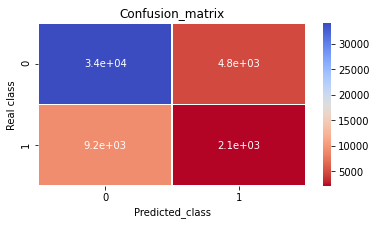


----------Classification Report------------------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83     38938
         1.0       0.31      0.19      0.23     11319

    accuracy                           0.72     50257
   macro avg       0.55      0.53      0.53     50257
weighted avg       0.68      0.72      0.70     50257



In [361]:
y_pred=classifier.predict(X_test)
y_pred = [int(1) if x> 0.24 else int(0) for x in y_pred ] 
grafik_cm(y_test,y_pred)